# projet de ML

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [34]:
data = pd.read_excel('Risque_data.xlsx')
data.head()

,A1,A2,A3,A4,A5,A6,A7,Risque
0,30.83,0.000,202.0,0,g,w,v,Risque Elevé
1,58.67,4.460,43.0,560,g,q,h,Risque Elevé
2,24.50,0.500,280.0,824,g,q,h,Risque Elevé
3,27.83,1.540,100.0,3,g,w,v,Risque Elevé
4,20.17,5.625,120.0,0,g,w,v,Risque Elevé


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    float64
 1   A2      690 non-null    float64
 2   A3      677 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   Risque  690 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 43.3+ KB


In [38]:
data.describe()

,A1,A2,A3,A4
count,678.000000,690.000000,677.000000,690.000000
mean,31.568171,4.758725,184.014771,1017.385507
std,11.957862,4.978163,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,75.000000,0.000000
50%,28.460000,2.750000,160.000000,5.000000
75%,38.230000,7.207500,276.000000,395.500000
max,80.250000,28.000000,2000.000000,100000.000000


In [40]:
data.duplicated().sum()

1

In [42]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [44]:
data.isnull().sum()

A1        12
A2         0
A3        13
A4         0
A5         6
A6         9
A7         9
Risque     0
dtype: int64

* Remplacer par la mediane

In [47]:
data['A1'] = data['A1'].fillna(data['A1'].median())
data['A3'] = data['A3'].fillna(data['A3'].median())

* Remplacer par le mode

In [50]:
for col in ['A5', 'A6', 'A7']:
    data[col] = data[col].fillna(data[col].mode()[0])

In [52]:
data.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
Risque    0
dtype: int64

## Valeurs aberrantes

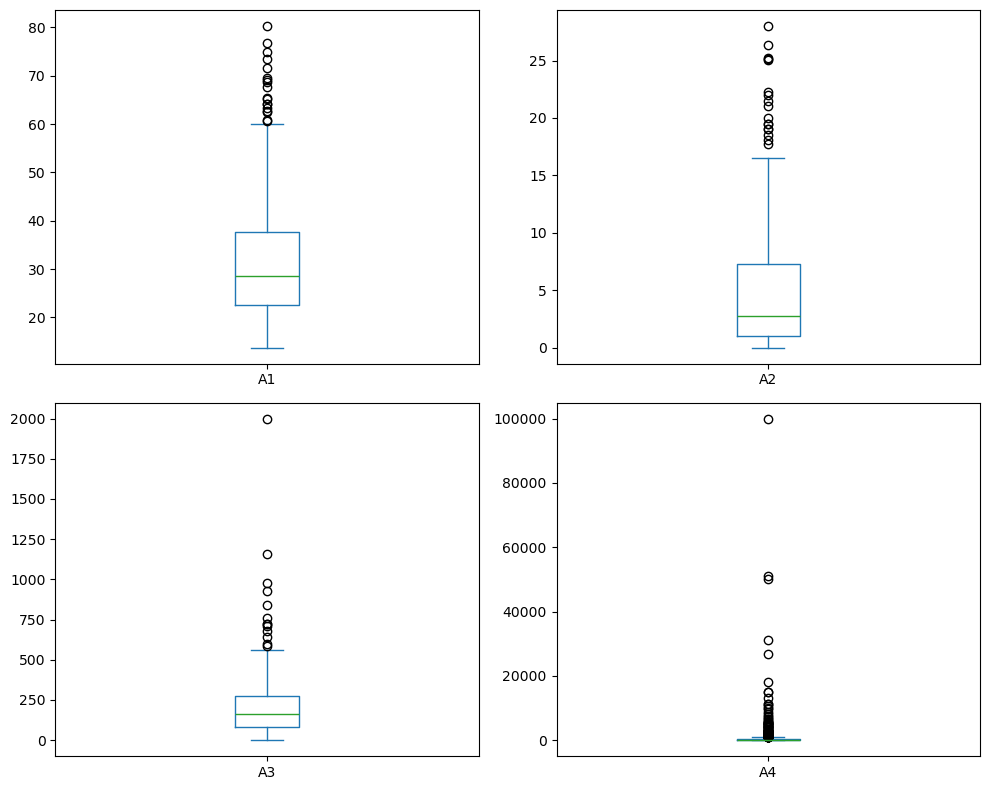

In [55]:
colonne_numérique = ['A1', 'A2', 'A3', 'A4']
data[colonne_numérique].plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8))
plt.tight_layout()
plt.show();

### Log transformation

In [58]:
numérique= ['A1', 'A2', 'A3', 'A4']
for i in numérique:
    data[i] = np.log1p(data[i])

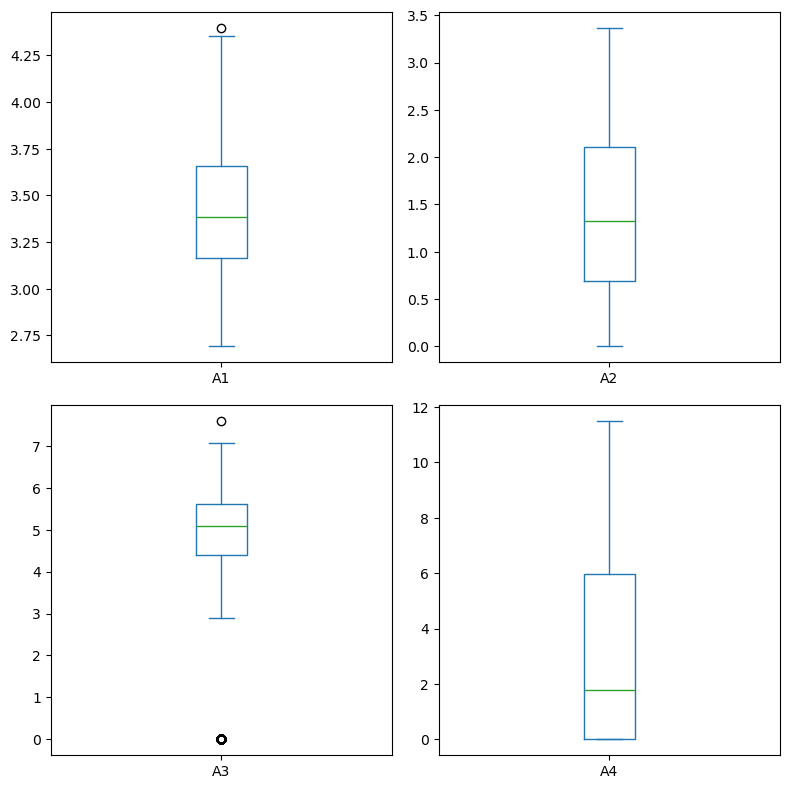

In [60]:
colonne_numérique = ['A1', 'A2', 'A3', 'A4']
data[colonne_numérique].plot(kind='box', subplots=True, layout=(2,2), figsize=(8,8))
plt.tight_layout()
plt.show();

### Encodage des variables

* encodage Rsique

In [64]:
from sklearn.preprocessing import LabelEncoder
data['Risque'] = LabelEncoder().fit_transform(data['Risque'])

* Encodage des varaibles categorielles

In [67]:
data = pd.get_dummies(data, columns=['A5', 'A6', 'A7'])

In [69]:
data.head(3)

,A1,A2,A3,A4,Risque,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A6_x,A7_bb,A7_dd,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z
0,3.460409,0.000000,5.313206,0.000000,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,4.088829,1.697449,3.784190,6.329721,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3.238678,0.405465,5.638355,6.715383,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


### Diviser la base de données en training & testing

In [72]:
from sklearn.model_selection import train_test_split

X = data.drop('Risque', axis=1)
y = data['Risque']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [230]:
# Modèle régression Logistique
lr = LogisticRegression() 
# Modèle CRT d'arbre de décision
crt= DecisionTreeClassifier()
# Modèle SVM
svm= SVC()
# Modèle KNN
knn = KNeighborsClassifier()
# Modèle Random Forest
rf= RandomForestClassifier()

In [204]:
lr.fit(X_train, y_train);
crt.fit(X_train, y_train);
svm.fit(X_train, y_train);
rf.fit(X_train, y_train);
knn.fit(X_train, y_train);

**Test des modèles sur la base de test**

In [221]:
y_predlr = lr.predict(X_test) 
y_predcrt = crt.predict(X_test)
y_predsvm = svm.predict(X_test)
y_predrf = rf.predict(X_test)
y_predknn = knn.predict(X_test)

### Evaluation des modèles developpés

In [240]:
print ('Accuracy Model Regression Logistique:', metrics.accuracy_score(y_test, y_predlr))
print ('Accuracy Model CRT:', metrics.accuracy_score(y_test, y_predcrt))
print ('Accuracy Model SVM:', metrics.accuracy_score(y_test, y_predsvm))
print ('Accuracy Model KNN:', metrics.accuracy_score(y_test, y_predknn))
print ('Accuracy Model Random Forest:', metrics.accuracy_score(y_test, y_predrf))

Accuracy Model Regression Logistique: 0.6884057971014492
Accuracy Model CRT: 0.6086956521739131
Accuracy Model SVM: 0.7028985507246377
Accuracy Model KNN: 0.6594202898550725
Accuracy Model Random Forest: 0.7608695652173914


In [159]:
print ('f1score Model Regression Logistique:', f1_score(y_test, y_predlr))
print ('f1score Model CRT:', f1_score(y_test, y_predcrt))
print ('f1score Model SVM:', f1_score(y_test, y_predsvm))
print ('f1score Model KNN:', f1_score(y_test, y_predknn))
print ('f1score Model Random Forest:', f1_score(y_test, y_predrf))

f1score Model Regression Logistique: 0.7261146496815286
f1score Model CRT: 0.6623376623376623
f1score Model SVM: 0.7484662576687117
f1score Model KNN: 0.6887417218543046
f1score Model Random Forest: 0.717948717948718


### Réglage des hyperparamètres

In [235]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Recherche des Meilleurs Hyperparamètres 

In [172]:
# Définir les hyperparamètres à régler et leurs plages respectives
param_dist = {
    'n_estimators': [10, 50, 100,],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':  ['gini','entropy','log_loss' ]
}

**Recherche aléatoire des hyperparamètres à régler**

In [175]:
from sklearn.model_selection import  RandomizedSearchCV

In [187]:
# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42);
# Effectuer une validation croisée de recherche aléatoire
random_search.fit(X_train, y_train);

In [188]:
# Obtenez les meilleurs paramètres et le meilleur score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Obtenez le meilleur modèle
best_model_rf_rs = random_search.best_estimator_

# Faire des prédictions sur l'ensemble de test en utilisant le meilleur modèle
y_pred_best_model_rf_rs= best_model_rf_rs.predict(X_test)

In [189]:
print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score (précision de la validation croisée):", best_score)

print ('Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir):', metrics.accuracy_score(y_test, y_pred_best_model_rf_rs))
print ('f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir):', f1_score(y_test, y_pred_best_model_rf_rs))

Meilleurs hyperparamètres: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 40, 'criterion': 'log_loss'}
Meilleur score (précision de la validation croisée): 0.745978705978706
Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir): 0.7463768115942029
f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir): 0.782608695652174


**Recherche en grille des hyperparamètres Modèle Random Forest**

In [191]:
from sklearn.model_selection import GridSearchCV

In [196]:
# Effectuer une recherche de grille avec validation croisée
grid_search = GridSearchCV(rf, param_dist , cv=5);
grid_search.fit(X_train, y_train);

In [198]:
# Obtenez les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Obtenez le meilleur modèle
best_model_rf_gs = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test en utilisant le meilleur modèle
y_pred_best_model_rf_gs = best_model_rf_gs.predict(X_test)

In [200]:
print("Meilleurs hyperparamètres:", best_params)
print("Meilleur score (précision de la validation croisée):", best_score)

print ('Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir):', metrics.accuracy_score(y_test,y_pred_best_model_rf_gs))
print ('f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir):', f1_score(y_test,y_pred_best_model_rf_gs))

Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Meilleur score (précision de la validation croisée): 0.7531367731367731
Accuracy Model Random Forest avec Meilleurs paramètres (recherche aléatoir): 0.7246376811594203
f1score Model Random Forest avec Meilleurs paramètres(recherche aléatoir): 0.7625


### Enregistrer le Meilleur Model

In [226]:
import pickle

In [232]:
#Sauvegarde du modèle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model_rf_rs, file)